<a href="https://colab.research.google.com/github/Charana04/Financial-Risk-Analysis-for-Investment-Portfolios/blob/main/Financial_Risk_Analysis_for_Investment_Portfolios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Risk Analysis for Investment Portfolios

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install yfinance


In [4]:
!pip install yfinance  # Install yfinance if not already installed

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Fetch Stock Fundamentals:


In [25]:
ticker = "AAPL"  # Change to any stock symbol
stock = yf.Ticker(ticker)

# Extract fundamental metrics
pe_ratio = stock.info.get('trailingPE', None)  # P/E Ratio
market_cap = stock.info.get('marketCap', None)  # Market Cap
sector = stock.info.get('sector', None)  # Industry sector

print(f"Stock: {ticker}, P/E Ratio: {pe_ratio}, Market Cap: {market_cap}, Sector: {sector}")


Stock: AAPL, P/E Ratio: 38.763866, Market Cap: 3674405863424, Sector: Technology


In [6]:
# Define stock ticker symbol (e.g., AAPL for Apple)
ticker = "AAPL"

# Fetch historical data (1 year)
stock_data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Display the first few rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583107  126.301500  123.326101  125.668857   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


Sentiment Analysis on Financial News

In [26]:
!pip install transformers requests
from transformers import pipeline
import requests


In [29]:
import requests
import json

# API Endpoint for Financial News (Example: NewsAPI)
url = "https://newsapi.org/v2/everything?q=stock market&apiKey=fc85183bd49645089e2eadf72e054105"

try:
    response = requests.get(url)

    # Check if the request was successful (HTTP 200 OK)
    if response.status_code == 200:
        data = response.json()  # Convert response to JSON

        # Ensure data is not empty
        if data and "articles" in data:
            articles = data["articles"]
            print(f"Fetched {len(articles)} articles.")
        else:
            print("No articles found.")
            articles = []

    else:
        print(f"Error: API returned status code {response.status_code}")
        articles = []

except json.JSONDecodeError as e:
    print("Error decoding JSON response:", e)
    articles = []

except requests.exceptions.RequestException as e:
    print("Request failed:", e)
    articles = []


Fetched 99 articles.


Improved Financial Sentiment Analysis:


In [56]:
!pip install transformers requests

from transformers import pipeline
import requests
import json

# API Endpoint for Financial News (Example: NewsAPI)
API_KEY = "fc85183bd49645089e2eadf72e054105"  # Replace with your valid API Key
query = "stock market"
url = f"https://newsapi.org/v2/everything?q={query}&apiKey={API_KEY}"

try:
    response = requests.get(url)

    # Check if the request was successful (HTTP 200 OK)
    if response.status_code == 200:
        data = response.json()  # Convert response to JSON

        # Ensure data is not empty and contains 'articles'
        if data and "articles" in data and data["articles"]:
            articles = data["articles"][:5]  # Fetch only the first 5 articles
            print(f"Fetched {len(articles)} articles.")

            # Extract headlines
            headlines = [article["title"] for article in articles]
            print("\nLatest News Headlines:")
            for h in headlines:
                print("-", h)

            # Perform Sentiment Analysis
            sentiment_pipeline = pipeline("sentiment-analysis")
            sentiment_scores = sentiment_pipeline(headlines)

            # Display Sentiment Results
            print("\nSentiment Analysis Results:")
            for headline, score in zip(headlines, sentiment_scores):
                print(f"{headline} --> Sentiment: {score['label']} (Score: {score['score']:.2f})")

        else:
            print("No articles found.")
            articles = []

    else:
        print(f"Error: API returned status code {response.status_code}")
        articles = []

except json.JSONDecodeError as e:
    print("Error decoding JSON response:", e)
    articles = []

except requests.exceptions.RequestException as e:
    print("Request failed:", e)
    articles = []


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Fetched 5 articles.

Latest News Headlines:
- Remember When Nanotech Was the Next Big Thing?
- Stock Market News for Feb 7, 2025
- Jamie Dimon sounds the alarm on stocks, says the market is looking 'kind of inflated'
- Intel's former CEO says the market is getting DeepSeek wrong after AI chip stock rout
- With tariffs rolled out, invest in these 4 services industries set to get a boost: Morgan Stanley


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0



Sentiment Analysis Results:
Remember When Nanotech Was the Next Big Thing? --> Sentiment: NEGATIVE (Score: 0.99)
Stock Market News for Feb 7, 2025 --> Sentiment: NEGATIVE (Score: 0.90)
Jamie Dimon sounds the alarm on stocks, says the market is looking 'kind of inflated' --> Sentiment: NEGATIVE (Score: 1.00)
Intel's former CEO says the market is getting DeepSeek wrong after AI chip stock rout --> Sentiment: NEGATIVE (Score: 1.00)
With tariffs rolled out, invest in these 4 services industries set to get a boost: Morgan Stanley --> Sentiment: POSITIVE (Score: 1.00)


In [7]:
if stock_data.empty:
    print("Error: No stock data retrieved. Check ticker symbol or internet connection.")


In [8]:
from google.colab import drive
drive.mount('/content/drive')

stock_data.to_csv('/content/drive/My Drive/stock_analysis.csv')
print("Stock data saved successfully!")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Stock data saved successfully!


In [13]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()


In [14]:
volatility = stock_data['Daily Return'].std() * (252 ** 0.5)  # Annualized
print(f"Annualized Volatility: {volatility:.2%}")


Annualized Volatility: 19.95%


In [15]:
import numpy as np

VaR_95 = np.percentile(stock_data['Daily Return'].dropna(), 5)
print(f"95% Value at Risk: {VaR_95:.2%}")


95% Value at Risk: -1.72%


 Advanced Risk Metrics
1. Calculate the Sharpe Ratio

In [30]:
risk_free_rate = 0.02  # Assume 2% risk-free return
sharpe_ratio = (returns_mean - risk_free_rate) / returns_std
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: -1.45


2.Compute Conditional Value at Risk (CVaR)

In [32]:
print(stock_data['Daily Return'].isnull().sum())  # Check NaN values
print(stock_data['Daily Return'].describe())  # Summary statistics


1
count    249.000000
mean       0.001835
std        0.012570
min       -0.048020
25%       -0.005891
50%        0.001879
75%        0.008846
max        0.046927
Name: Daily Return, dtype: float64


In [34]:
print(stock_data.columns)  # See available columns


MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('Daily Return',     ''),
            (   '50-day MA',     ''),
            (  '200-day MA',     '')],
           names=['Price', 'Ticker'])


In [36]:
# Access the 'Daily Return' column properly
stock_data[('Daily Return', '')] = stock_data[('Close', 'AAPL')].pct_change()

# Drop NaN values
stock_data = stock_data.dropna(subset=[('Daily Return', '')])

# Compute 95% VaR
VaR_95 = stock_data[('Daily Return', '')].quantile(0.05) * 100
print(f"95% Value at Risk (VaR): {VaR_95:.2f}%")


95% Value at Risk (VaR): -1.72%


In [37]:
import numpy as np

confidence_level = 0.95
VaR_95 = np.percentile(stock_data['Daily Return'], 100 * (1 - confidence_level))
CVaR_95 = stock_data['Daily Return'][stock_data['Daily Return'] <= VaR_95].mean()

print(f"95% VaR: {VaR_95:.2%}, 95% CVaR: {CVaR_95:.2%}")


95% VaR: -1.72%, 95% CVaR: -2.50%


3.Calculate Beta (Stock Market Sensitivity)

In [44]:
# Assuming 'Adj Close' contains stock prices
stock_returns = stock_data['Close'].pct_change().dropna()
market_returns = market_data['Close'].pct_change().dropna()

# Check if they exist
print(f"Stock Returns Length: {len(stock_returns)}")
print(f"Market Returns Length: {len(market_returns)}")


Stock Returns Length: 248
Market Returns Length: 249


In [45]:
returns_df = pd.concat([stock_returns, market_returns], axis=1).dropna()
stock_returns = returns_df.iloc[:, 0]  # Reassign aligned stock returns
market_returns = returns_df.iloc[:, 1]  # Reassign aligned market returns

print(f"Stock Returns Length (After Fix): {len(stock_returns)}")
print(f"Market Returns Length (After Fix): {len(market_returns)}")


Stock Returns Length (After Fix): 248
Market Returns Length (After Fix): 248


Beta > 1 → Stock is more volatile than the market.
Beta < 1 → Stock is less volatile than the market.
Beta ≈ 1 → Stock moves in sync with the market.


In [47]:
import numpy as np

# Step 1: Align stock and market returns (already done)
returns_df = pd.concat([stock_returns, market_returns], axis=1).dropna()
stock_returns = returns_df.iloc[:, 0]
market_returns = returns_df.iloc[:, 1]

# Step 2: Perform linear regression to find Beta
cov_matrix = np.cov(stock_returns, market_returns)  # Compute covariance matrix
beta = cov_matrix[0, 1] / cov_matrix[1, 1]  # Beta = Cov(Stock, Market) / Var(Market)

print(f"Calculated Beta: {beta:.2f}")


Calculated Beta: 1.10


50-day and 200-day moving averages (MA) for a stock based on its closing price.

In [48]:
stock_data.loc[:, '50-day MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data.loc[:, '200-day MA'] = stock_data['Close'].rolling(window=200).mean()


In [51]:
print(stock_data.head())  # Check existing columns
print(stock_data.columns)  # Confirm column names


Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2023-01-04  124.907707  127.181276  123.642420  125.431615  89113600   
2023-01-05  123.583107  126.301500  123.326101  125.668857  80962700   
2023-01-06  128.130219  128.792516  123.454587  124.561717  87754700   
2023-01-09  128.654144  131.876686  128.397138  128.970474  70790800   
2023-01-10  129.227493  129.751401  126.647490  128.762894  63896200   

Price      Daily Return 50-day MA 200-day MA  
Ticker                                        
Date                                          
2023-01-04     0.010314       NaN        NaN  
2023-01-05    -0.010605       NaN        NaN  
2023-01-06     0.036794       NaN        NaN  
2023-01-09     0.004089       NaN        NaN  
2023-01-10     0.004457       NaN        NaN  
MultiIndex([(       'Close', 'AAPL'),
         

In [53]:
stock_data.loc[:, ('50-day MA', '')] = stock_data.loc[:, ('Close', 'AAPL')].rolling(window=50).mean()
stock_data.loc[:, ('200-day MA', '')] = stock_data.loc[:, ('Close', 'AAPL')].rolling(window=200).mean()


In [54]:
stock_data = stock_data.dropna(subset=[('50-day MA', ''), ('200-day MA', '')])


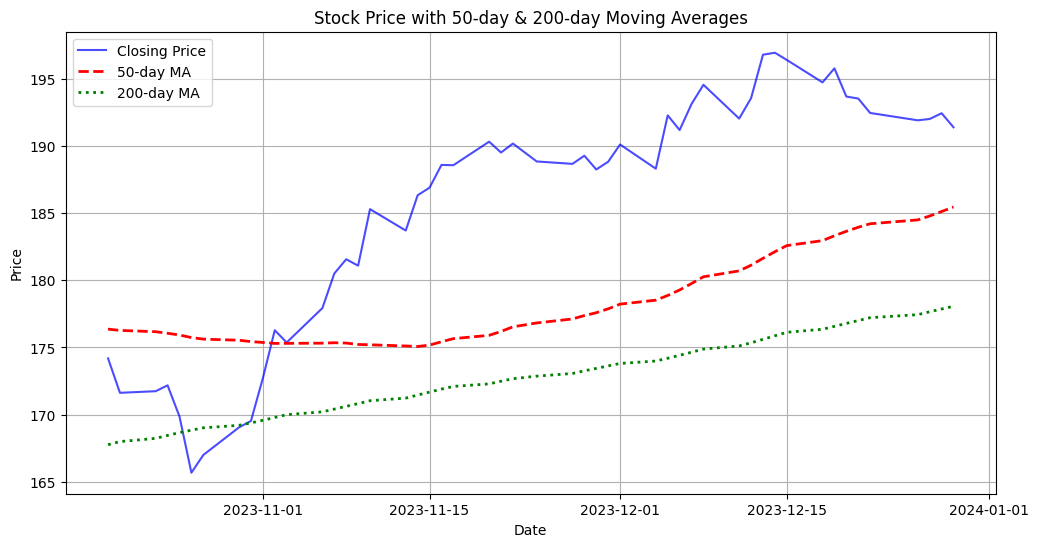

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data[('Close', 'AAPL')], label='Closing Price', alpha=0.7, color='blue')
plt.plot(stock_data.index, stock_data[('50-day MA', '')], label='50-day MA', linestyle='dashed', color='red', linewidth=2)
plt.plot(stock_data.index, stock_data[('200-day MA', '')], label='200-day MA', linestyle='dotted', color='green', linewidth=2)

plt.title("Stock Price with 50-day & 200-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Assume a portfolio with weights in AAPL and MSFT
weights = [0.6, 0.4]  # 60% AAPL, 40% MSFT
tickers = ["AAPL", "MSFT"]

# Fetch data
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Portfolio return
portfolio_return = np.dot(weights, returns.mean()) * 252
print(f"Expected Annual Portfolio Return: {portfolio_return:.2%}")

# Portfolio volatility (risk)
cov_matrix = returns.cov() * 252
portfolio_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")


[*********************100%***********************]  2 of 2 completed

Expected Annual Portfolio Return: 47.62%
Portfolio Volatility: 19.39%


In [20]:
stock_data.to_excel("stock_analysis.xlsx")


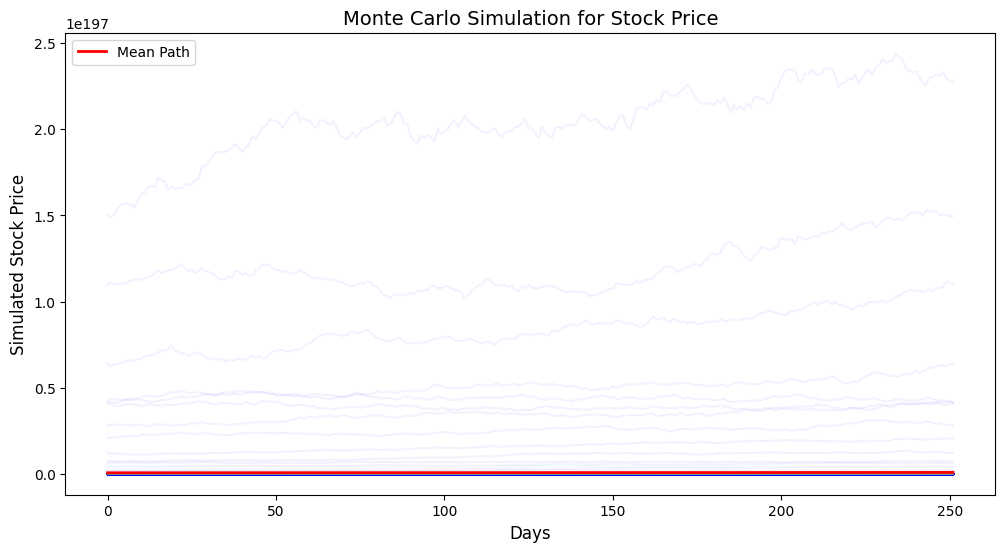

In [24]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot all simulations with reduced opacity
for i in range(1000):
    plt.plot(simulated_prices[i], color="blue", alpha=0.05)  # Very light lines

# Highlight a few random paths for clarity
for i in np.random.choice(1000, 10, replace=False):
    plt.plot(simulated_prices[i], linewidth=1.2, alpha=0.5)  # Some visible paths

# Highlight the average simulated path
mean_simulation = simulated_prices.mean(axis=0)
plt.plot(mean_simulation, color="red", linewidth=2, label="Mean Path")

# Titles & Labels
plt.title("Monte Carlo Simulation for Stock Price", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Simulated Stock Price", fontsize=12)
plt.legend()
plt.show()
